# Analysis of the Relationship between Crime Rate and Median Home Value

This notebook analyses how the crime rate impacts median home value. We begin by exploring the dataset, visualizing the relationships, and then fitting a simple linear regression model. The goal is to estimate how much median home value changes when the crime rate increases by 0.01, holding all other factors constant.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 2. Load and Inspect the Dataset

The dataset `houseprice.csv` is in the directory `data\houseprice.csv`. We load the data and inspect its structure.

In [2]:
# Load the dataset convert into dataframe

file_path = "data\houseprice.csv"
data = pd.read_csv(file_path)

# Check for missing values

print('\nMissing Values:')
print(data.isnull().sum())


Missing Values:
crime rate                         0
residential land zone              0
business acres                     0
Charles River                      0
nitric oxides                      0
number of rooms                    0
age                                0
distances to employment centres    0
accessibility to highways          0
property-tax                       0
pupil-teacher ratio                0
lower income levels                0
Median Home Value                  0
dtype: int64


In [3]:
# Display basic information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   crime rate                       506 non-null    float64
 1   residential land zone            506 non-null    float64
 2   business acres                   506 non-null    float64
 3   Charles River                    506 non-null    int64  
 4   nitric oxides                    506 non-null    float64
 5   number of rooms                  506 non-null    float64
 6   age                              506 non-null    float64
 7   distances to employment centres  506 non-null    float64
 8   accessibility to highways        506 non-null    int64  
 9   property-tax                     506 non-null    int64  
 10  pupil-teacher ratio              506 non-null    float64
 11  lower income levels              506 non-null    float64
 12  Median Home Value     

In [4]:
# Replace spaces with underscores and converting the columns to lower case, if column names contain spaces seaborn may have trouble recognizing them.
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [5]:
# Display first few rows

display(data.head())

,crime_rate,residential_land_zone,business_acres,charles_river,nitric_oxides,number_of_rooms,age,distances_to_employment_centres,accessibility_to_highways,property-tax,pupil-teacher_ratio,lower_income_levels,median_home_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## 3. Exploratory Data Analysis (EDA)

We explore the relationship between crime rate and median home value with a scatter plot and compute their correlation coefficient.


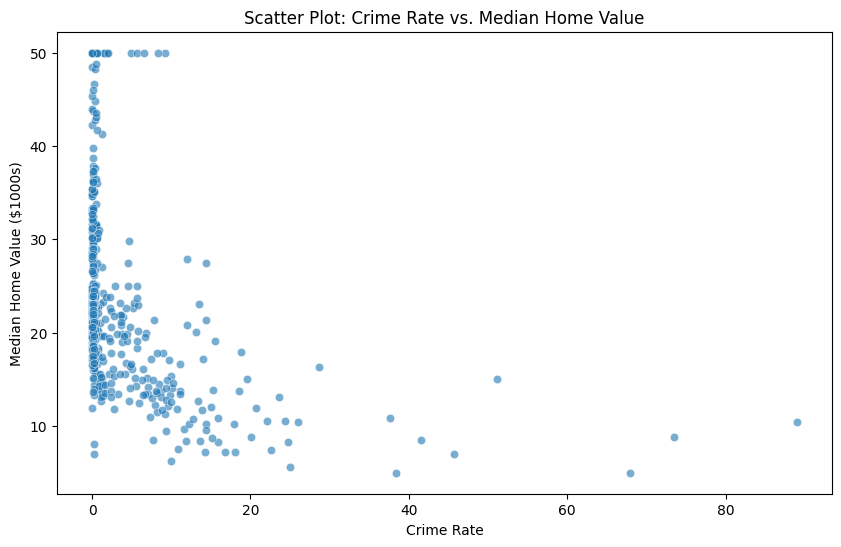

In [6]:
# Scatter Plot: Crime Rate vs. Median Home Value

plt.figure(figsize=(10, 6))
sns.scatterplot(x="crime_rate", y="median_home_value", data=data, alpha=0.6)
plt.xlabel("Crime Rate")
plt.ylabel("Median Home Value ($1000s)")
plt.title("Scatter Plot: Crime Rate vs. Median Home Value")
plt.show()

In [7]:
# Compute and print the correlation coefficient

corr_coef = data["crime_rate"].corr(data["median_home_value"])
print("Correlation coefficient between crime rate and median home value:", corr_coef)

Correlation coefficient between crime rate and median home value: -0.3883046085868113


## 4. Simple Linear Regression Analysis

We first fit a simple linear regression model with `crime rate` as the only predictor. This model estimates how much home prices change with a 0.01 increase in crime rate.

**Interpretation**
- The regression coefficient for crime rate tells us the change in median home value (in $1000s) for a 1-unit increase in crime rate.  
- To find the effect of a 0.01 increase, we multiply the coefficient by 0.01.

In [8]:
# Define independent and dependent variables

X_simple = data["crime_rate"]
y = data["median_home_value"]

In [9]:
# Fit the simple linear regression model

X_simple_const = sm.add_constant(X_simple)
X = data.drop(columns=["median_home_value"])
X = sm.add_constant(X)
model_simple = sm.OLS(y, X_simple_const).fit()

In [10]:
# Print the summary of the model

print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:      median_home_value   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           1.17e-19
Time:                        02:35:59   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.0

**Interpretation:**  
Suppose the coefficient for `crime rate` is -0.4152. This implies that:
- A 1-unit increase in crime rate decreases the median home value by about $415.20k.
- Therefore, a 0.01 increase in crime rate results in a decrease of approximately \(-0.4152 \times 0.01 \approx -0.004152\) or about **$4.15k** (in thousands) lower median home value.

## 6. Visualization of Feature Relationships

We create additional visualizations to better understand the data:
1. A **correlation heatmap** to see how features are correlated.
2. A **regression plot** to visualize the adjusted relationship between crime rate and median home value.

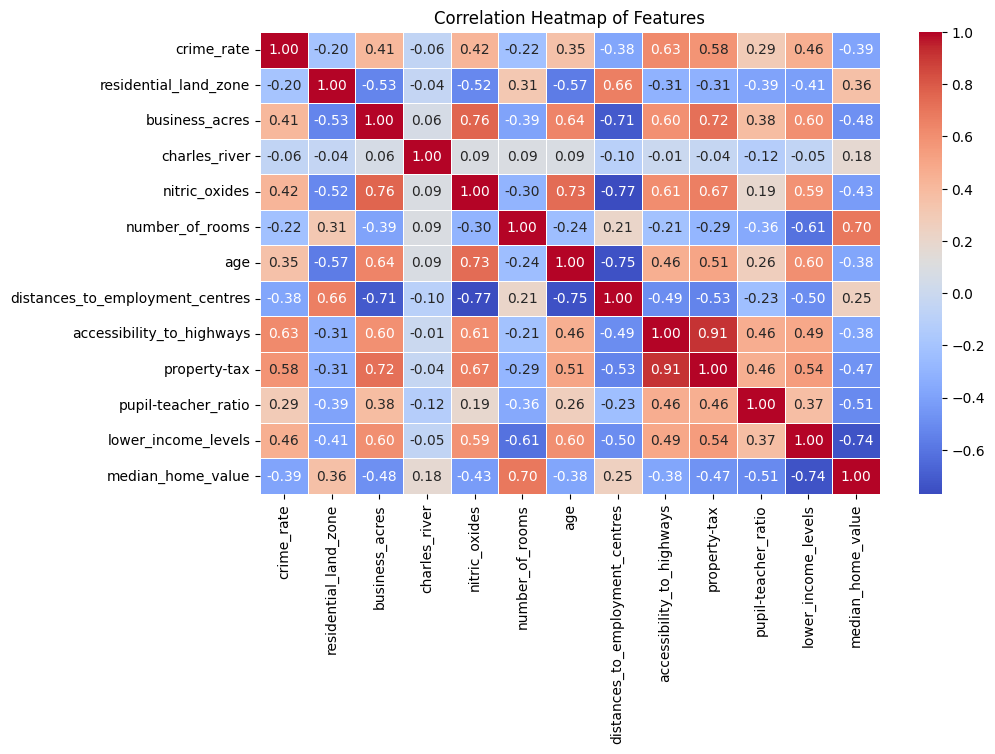

In [11]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

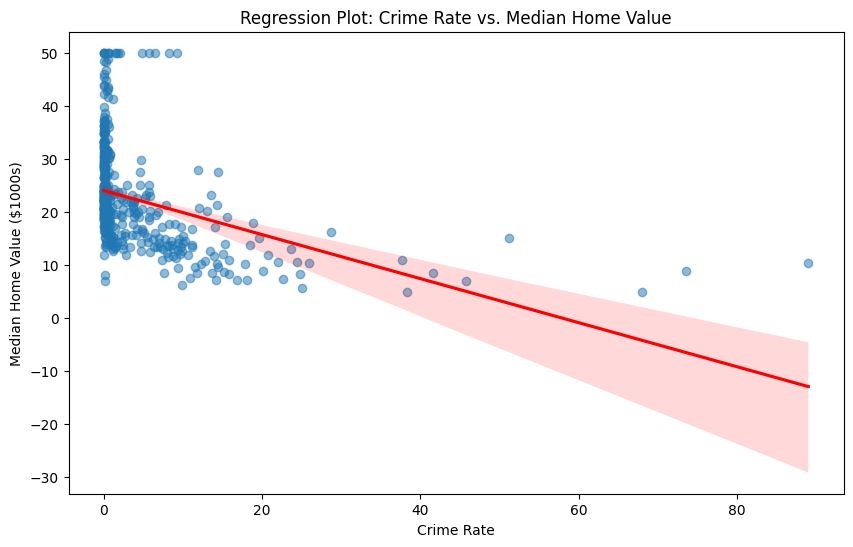

In [12]:
# Regression Plot: Crime Rate vs. Median Home Value

plt.figure(figsize=(10, 6))
sns.regplot(x="crime_rate", y="median_home_value", data=data, 
            scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Crime Rate")
plt.ylabel("Median Home Value ($1000s)")
plt.title("Regression Plot: Crime Rate vs. Median Home Value")
plt.show()

In [13]:
# OLS Model with Feature Selection

model = sm.OLS(data["median_home_value"], X).fit()
significant_features = model.pvalues[model.pvalues < 0.05].index.tolist()

X_refined = X[significant_features]
model_refined = sm.OLS(data["median_home_value"], X_refined).fit()

print(model_refined.summary())

                            OLS Regression Results                            
Dep. Variable:      median_home_value   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          1.73e-135
Time:                        02:36:00   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Summary

In [14]:
# Crime Rate Impact Analysis

if "crime_rate" in model_refined.params:
    slope = model_refined.params["crime_rate"]
    effect_per_0_01 = slope * 0.01
    print(f"For every 0.01 increase in crime rate, median home price changes by {effect_per_0_01:.4f} thousand dollars.")
else:
    print("Crime rate is not statistically significant.")

For every 0.01 increase in crime rate, median home price changes by -0.0012 thousand dollars.
